# Load MNIST dataset

In [1]:
# import the mnist digits using tensorflow
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# - display data shapes
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))
print('\n')

11501568/11490434 [==============================] - 0s 0us/step
MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)




# Auxiliar Functions

In [8]:
import matplotlib.pyplot as plt

def plot_2d(embedding,labels,title):
  plt.figure(figsize=[25,10])
  plt.scatter(
      embedding[:, 0],
      embedding[:, 1],
      c=labels
  )
  plt.gca().set_aspect('equal', 'datalim')
  plt.title(title, fontsize=24)
  plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.show()

def plot_3d(embedding,labels, title):
  # plot the training data and overlayed test sample
  fig = plt.figure(figsize=[25,10])
  ax = plt.axes(projection ="3d")
  p = ax.scatter(
      embedding[:, 0],
      embedding[:, 1],
      embedding[:, 2],
      c=labels
  )
  plt.title(title, fontsize=24)
  fig.colorbar(p,boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
  plt.show()

# Test sample

Sample #: 46244
MNIST Number: 5




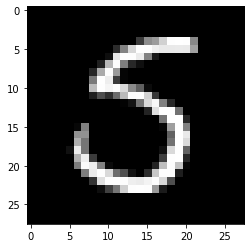

In [3]:
# - randomly pick a sample image
# sample = np.random.randint(low=0, high=len(X_train))
# - pick a sample image
import matplotlib.pyplot as plt
import numpy as np

sample = 46244
print('Sample #: ' + str(sample))
print('MNIST Number: ' + str(Y_train[sample]))
print('\n')
image = X_train[sample]

# - plot the sample image
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

# Manifolds

In [4]:
# get information about number of samples, rows, and columns in the dataset. 
# note the shape of each variable in the output above 
nsamples, nx, ny = X_test.shape

# reshape the data to comply with UMAP reducer requirements
X_test = X_test.reshape(nsamples,nx*ny)

In [13]:
from sklearn.preprocessing import StandardScaler
## Standardizing the data
X_test = StandardScaler().fit_transform(X_test)

## Isomap (Isometric  Feature  Mapping)

In [5]:
from sklearn.manifold import Isomap
import time

start = time.time()
isomap = Isomap(n_components=3).fit_transform(X_test) 
print('Duration: {} seconds'.format(time.time() - start))

Duration: 88.35871863365173 seconds


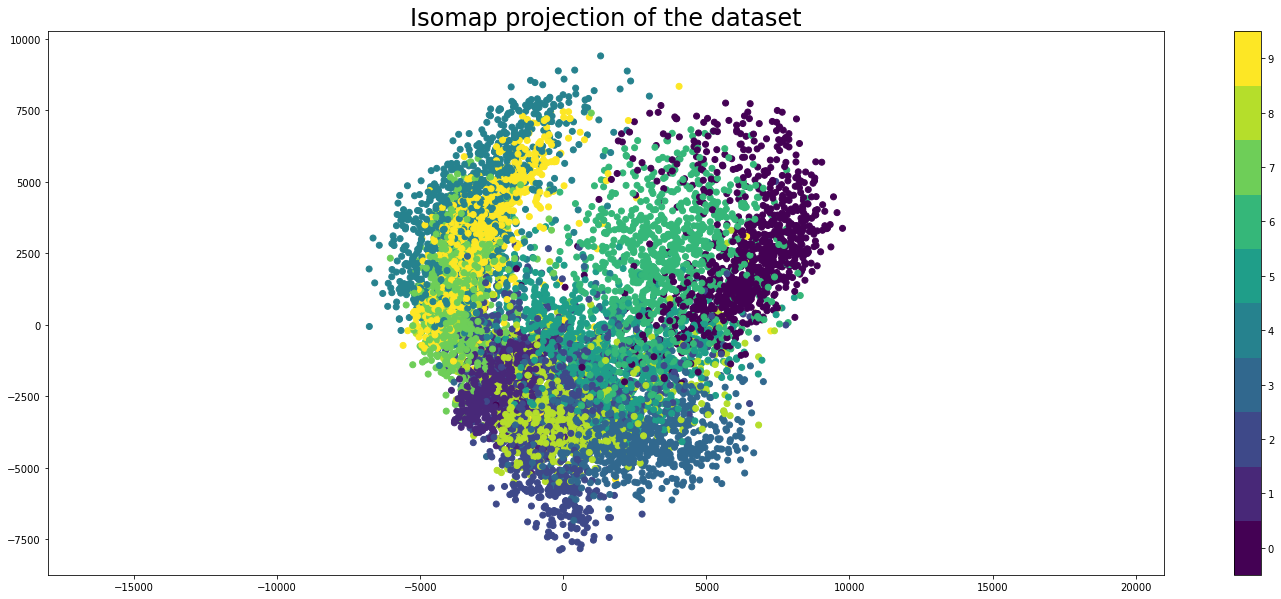

In [9]:
plot_2d(isomap, Y_test, "Isomap projection of the dataset")

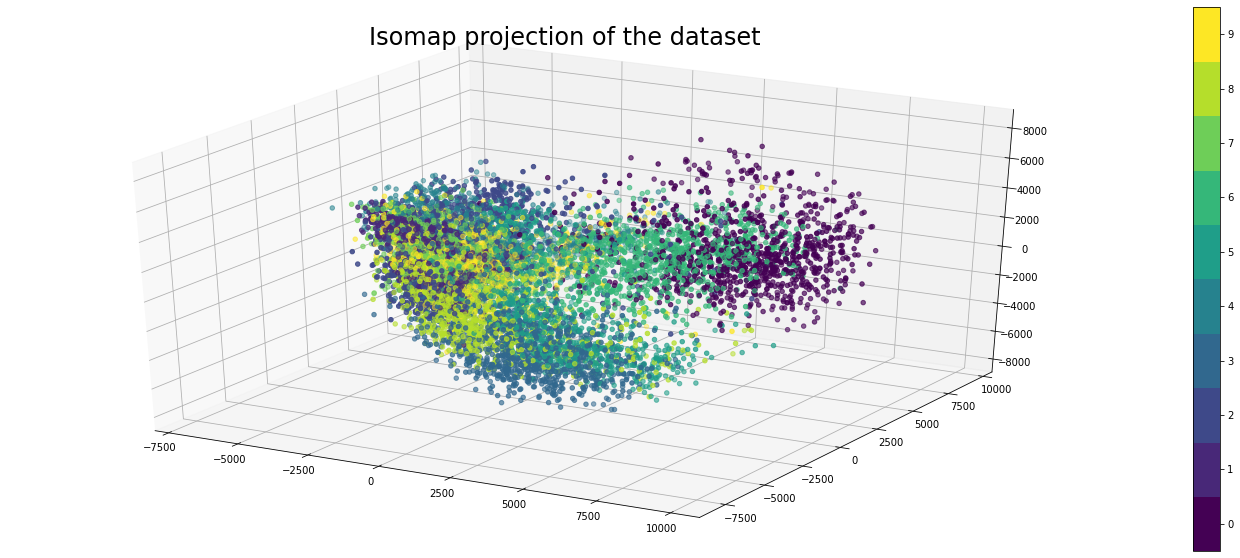

In [10]:
plot_3d(isomap, Y_test, "Isomap projection of the dataset")

## LE (Laplacian  Eigenmaps)

In [11]:
from sklearn.manifold import SpectralEmbedding

start = time.time()
le = SpectralEmbedding(n_components=3, random_state=0,eigen_solver="arpack").fit_transform(X_test) 
print('Duration: {} seconds'.format(time.time() - start))

Duration: 284.46026587486267 seconds


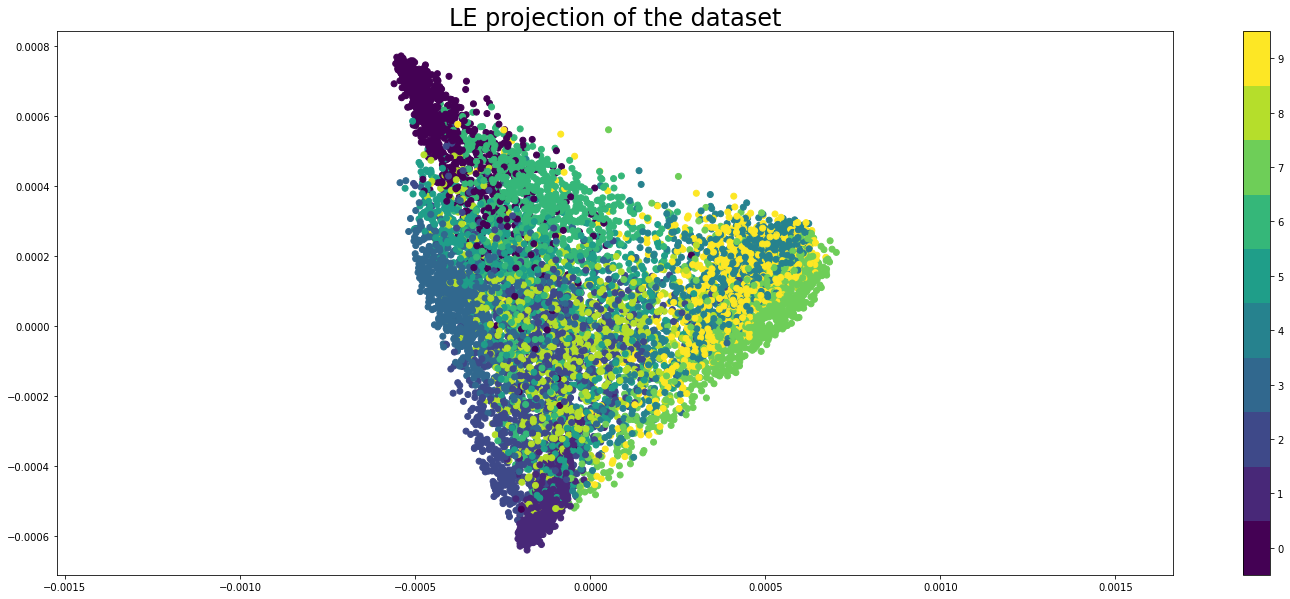

In [12]:
plot_2d(le, Y_test, "LE projection of the dataset")

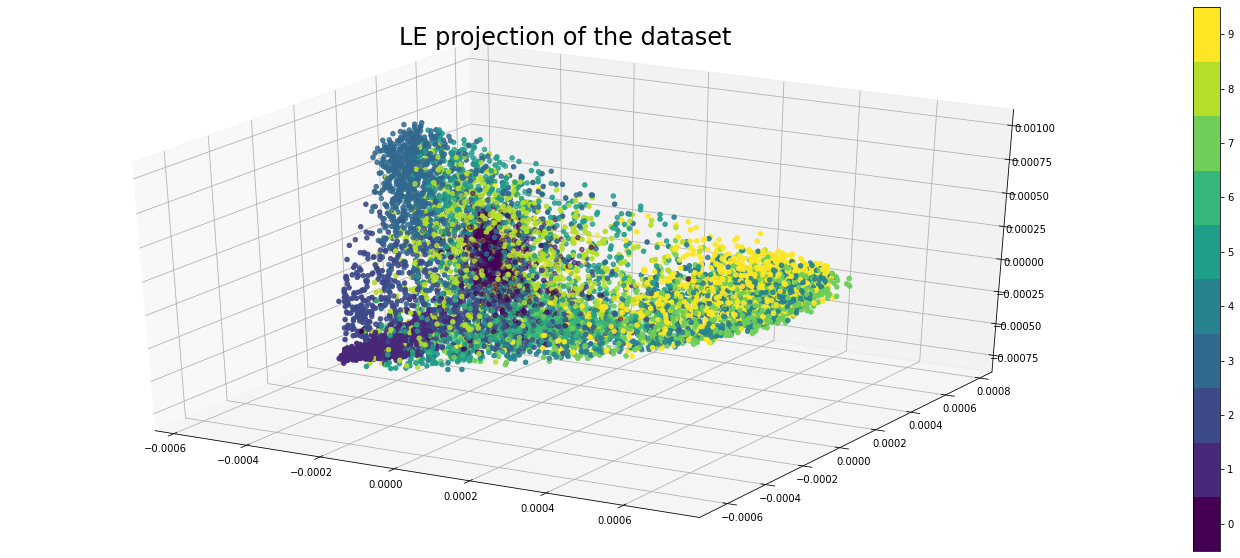

In [13]:
plot_3d(le, Y_test, "LE projection of the dataset")

## LLE (Locally Linear Embedding)

In [14]:
from sklearn.manifold import LocallyLinearEmbedding

start = time.time()
lle = LocallyLinearEmbedding(n_components=3).fit_transform(X_test) 
print('Duration: {} seconds'.format(time.time() - start))

Duration: 25.749505519866943 seconds


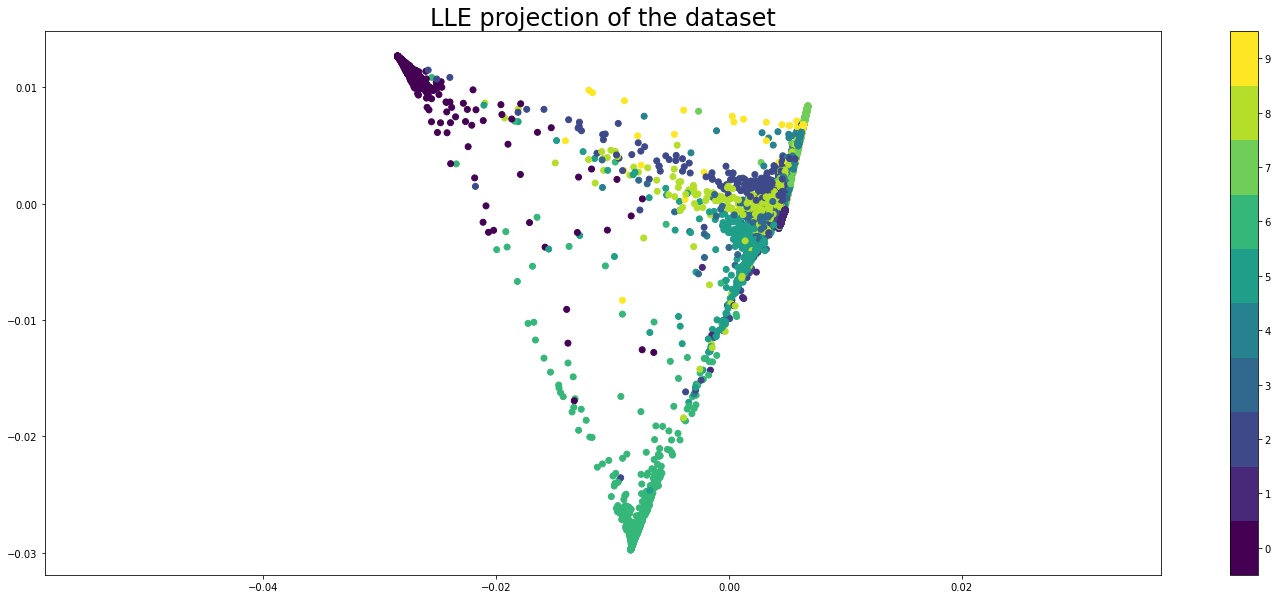

In [15]:
plot_2d(lle, Y_test, "LLE projection of the dataset")

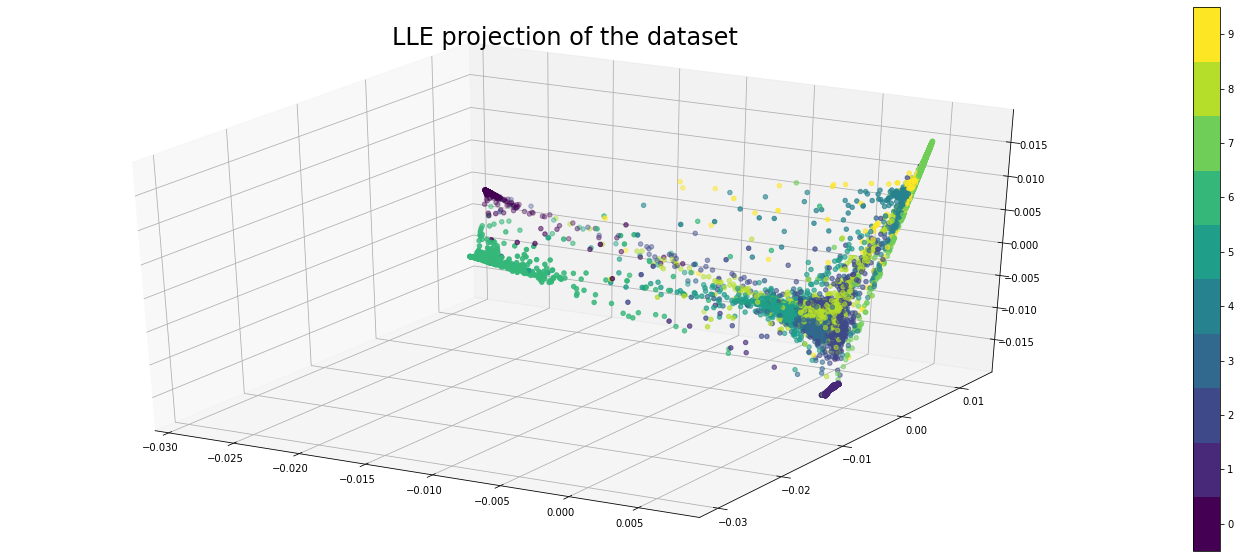

In [16]:
plot_3d(lle, Y_test, "LLE projection of the dataset")

## T-SNE (t-Distribution  Stochastic  Neighbor  Embeddings)

In [17]:
#TSNE
import time
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

start = time.time()
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(X_test)
tsne = TSNE(random_state = 42, n_components=3,verbose=True, perplexity=20, n_iter=400).fit_transform(pca_result_50)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...
[t-SNE] Computed neighbors for 10000 samples in 2.259s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 407.624841
[t-SNE] KL divergence after 250 iterations with early exaggeration: 87.557938
[t-SNE] KL divergence after 400 iterations: 2.051529
Duration: 98.84905576705

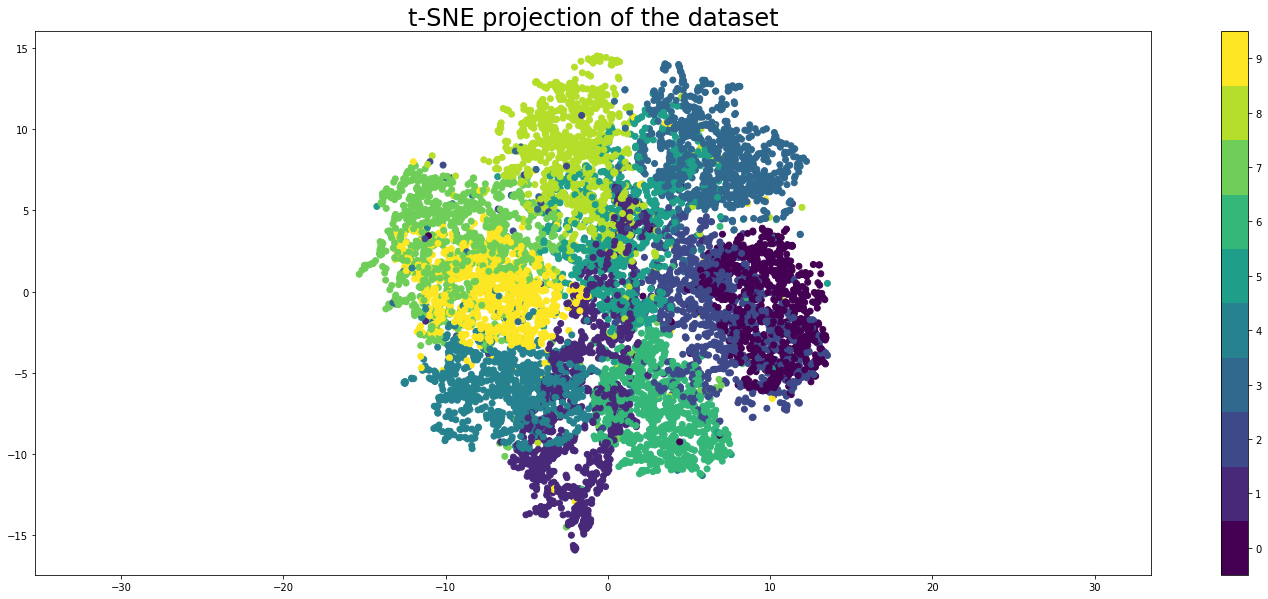

In [18]:
plot_2d(tsne, Y_test, "t-SNE projection of the dataset")

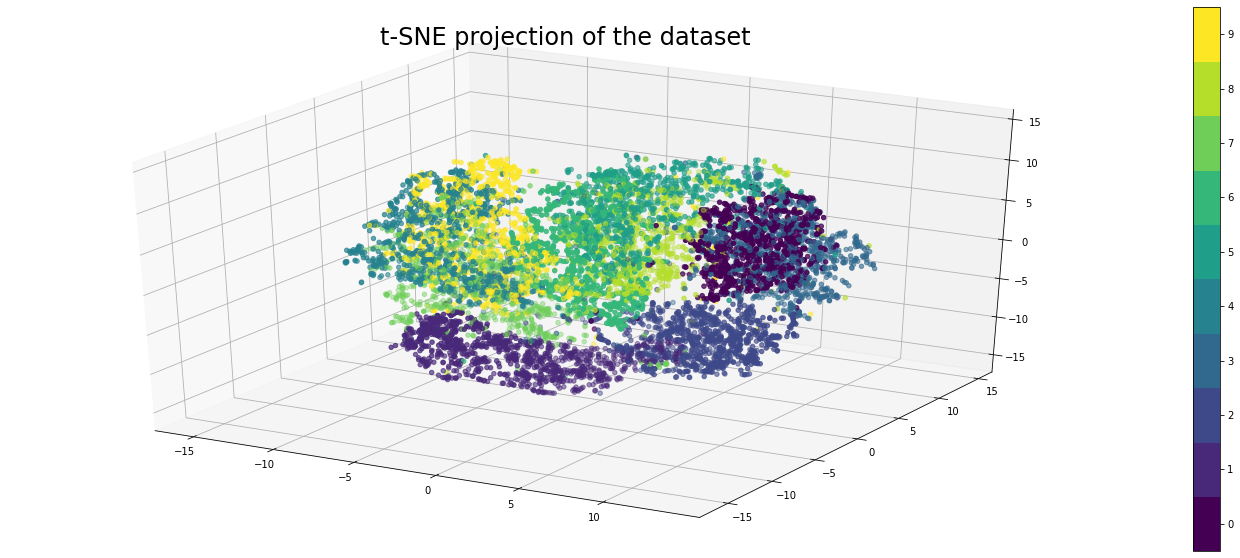

In [19]:
plot_3d(tsne, Y_test, "t-SNE projection of the dataset")

## UMAP (Uniform  Manifold  Approximation  and  Projection)

In [20]:
!pip install umap-learn[plot]

     |████████████████████████████████| 86 kB 2.4 MB/s 
     |████████████████████████████████| 1.1 MB 11.6 MB/s 
     |████████████████████████████████| 15.8 MB 37.4 MB/s 
     |████████████████████████████████| 76 kB 4.6 MB/s 
     |████████████████████████████████| 802 kB 42.4 MB/s 
     |████████████████████████████████| 132 kB 59.9 MB/s 
     |████████████████████████████████| 802 kB 48.5 MB/s 
     |████████████████████████████████| 793 kB 54.7 MB/s 
     |████████████████████████████████| 793 kB 43.5 MB/s 
     |████████████████████████████████| 791 kB 48.3 MB/s 
     |████████████████████████████████| 786 kB 47.9 MB/s 
     |████████████████████████████████| 779 kB 41.2 MB/s 
     |████████████████████████████████| 778 kB 49.2 MB/s 
     |████████████████████████████████| 776 kB 48.7 MB/s 
     |████████████████████████████████| 769 kB 43.9 MB/s 
     |████████████████████████████████| 766 kB 48.8 MB/s 
     |████████████████████████████████| 1.0 MB 55.8 MB/s 
     |███████████

In [21]:
#UMAP
import umap

# unsupervised
start = time.time()
reducer = umap.UMAP(random_state=42,n_components=3)
umap = reducer.fit_transform(X_test)
print('Duration: {} seconds'.format(time.time() - start))

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Duration: 51.448160886764526 seconds


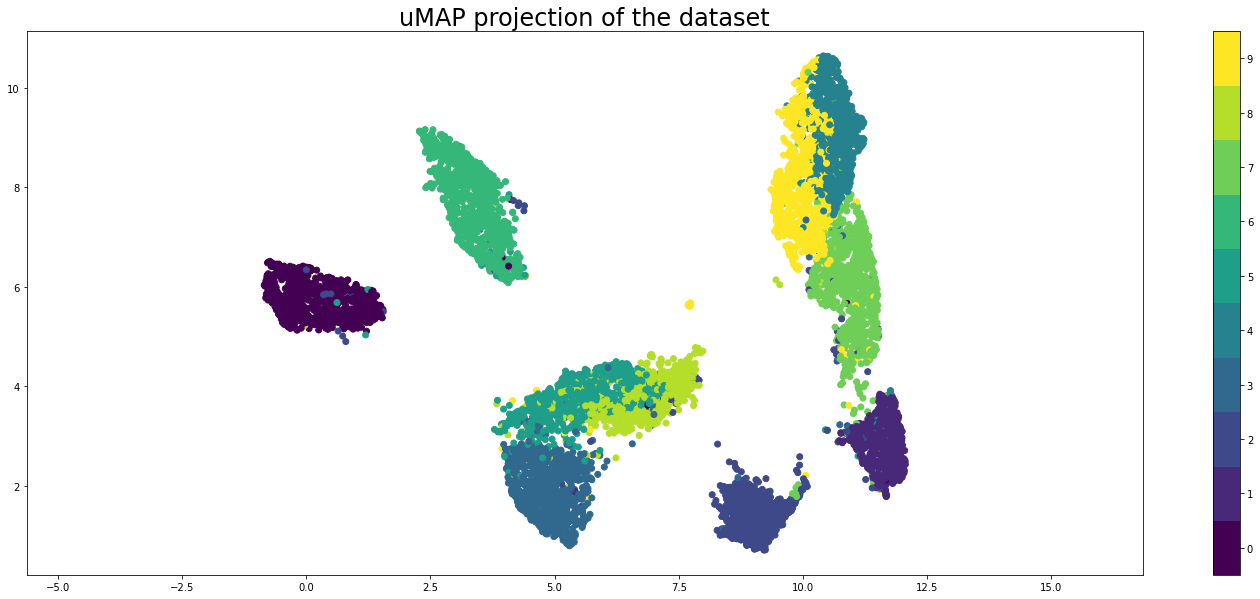

In [22]:
plot_2d(umap, Y_test, "uMAP projection of the dataset")

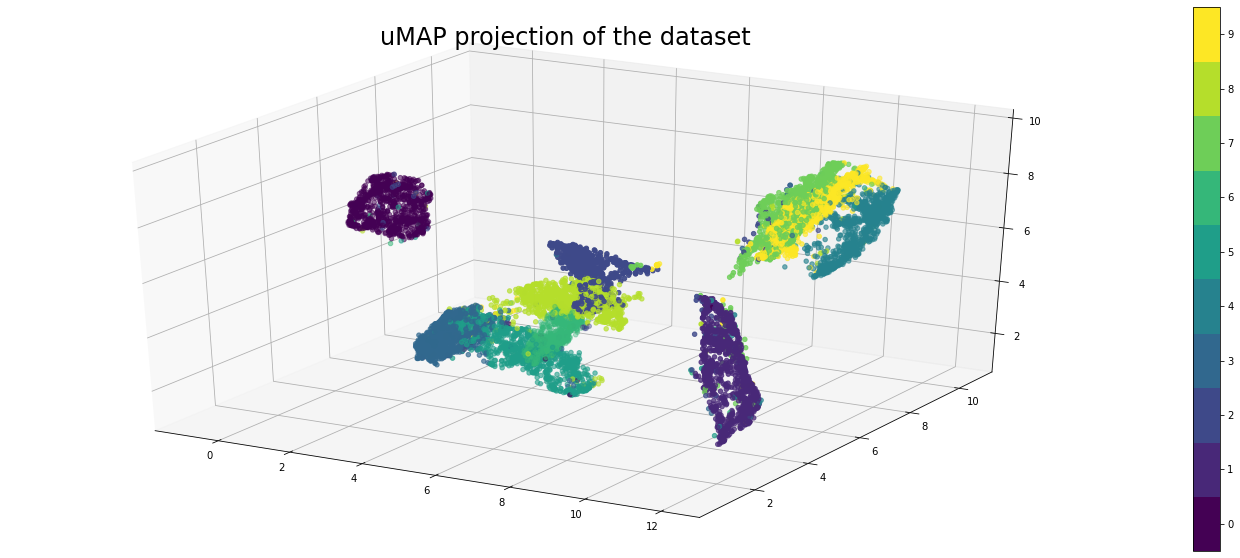

In [23]:
plot_3d(umap, Y_test, "uMAP projection of the dataset")